1 code template - 7 questions can be attacked

## How to Detect if it is a stack question ?

    - The question will be based on an Array/List
    
    - The brute force solution will be O(n^2) complexity such that inner loop iterator "j" depends on outer loop "i".
    
    Example : 
            for i in range(len(arr)):
                for j in range(i, len(arr)):
                        # do-something

## Nearest Greater Element to Right

Given an array, return an output array containing the Next Greater Integer to its Right for each element. <br>

Example :<br>

arr = [ 1, 3, 0, 0, 1, 2, 4] <br>
output = [3, 4, 1, 1, 2, 4, -1] <br>

Note : For any element not having a greater number to its right, its NGR = -1 <br>

#### Solution

In NGR we can see we need to use Stack. <br>

How Stack ?  

    - An array question
    - Writing the Brute Force solution gives us O(n^2) solution where inner loop iterator "j" depends on outer loop "i".
    
<span style="color:yellow"> NGR Brute Force </span>  
    
    def NGR(arr):
    
        output = [-1]*len(arr)
        
        for i in range(len(arr)):
            for j in range(i+1, len(arr)):
                if arr[j] > arr[i]:
                    output[i] = arr[j]
                    break
        
        return output
    
<span style="color:red">Why is the time complexity O(n^2)</span> <br>

<span style="color:yellow">Find the worst case scenario </span> <br>

Ans :  Imagine a reverse sorted array like [5,4,3,2,1] . Now for each element we will traverse complete array to the right of it to find element bigger than it. For 5 , we will go to 4, then 3, then 2, then 1 and finally when array will end we will realise its NGR is -1. <br>

Therefore for each element we need to travel (n-1) + (n-2) + (n-3) +..... 3,2,1 times. This summation is O(n^2)

### Stack approach

1) Iterate the elements from the right i.e from last element of the arrat <br>
2) Keep pushing each element to the stack as you visit. This actually is last step in each loop iteration <br>
3) As you visit the element, to find its NGR, pop element from the stack and check if it is greater than the current element. If yes, then it is its NGR, ELSE, keep popping element out of stack till you find one. <br>
4) If the stack becomes empty it means that there is no NGR for this element, hence take it as -1. <br>
5) Also initially since stack was empty there could not be an NGR for the last element of the array, hence keep it as -1 <br>

In [8]:
def nearestGreaterElement_to_right(array):
    
    output = list()
    stack = list()
    
    for i in range(len(array)-1, -1, -1):
        
        element = array[i]
        
        # CASE : First element = rightmost element of array
        # we start iterating from rightmost element so for that element there is no greater element to its right
        # hence we need to put -1 for it
        
        if len(stack) == 0:
            output.append(-1)
            
        elif len(stack) >0 and stack[-1] > element:
            output.append(stack[-1])
        
        # below else condition would be   :     len(stack) >0 and stack[-1] <= element
        else:
            
            while len(stack) >0 and stack[-1] <= element:
                stack.pop()
                
            if len(stack) == 0:
                output.append(-1)
            else:
                output.append(stack[-1])
        
        stack.append(element)
        
    return output[::-1]

In [9]:
x = nearestGreaterElement_to_right([1,3,2,4])
print(x)

[3, 4, 4, -1]


### To avoid reversing the array you can start the solution like this

Create an array of size len(arr) and initialize all values at -1 <br>
Use the "i" variable to store values for each element's NGR

In [5]:
def NGR_without_Reverse(array):
    
    output = [-1]*len(array)
    stack = list()
    
    for i in range(len(array)-1, -1, -1):
        
        element = array[i]
        
        # CASE : First element = rightmost element of array
        # we start iterating from rightmost element so for that element there is no greater element to its right
        # hence we need to put -1 for it
        
        if len(stack) == 0:
            output[i] = -1
            
        elif len(stack) >0 and stack[-1] > element:
            output[i] = stack[-1]
            
        elif len(stack) >0 and stack[-1] <= element:
            
            while len(stack) >0 and stack[-1] <= element:
                stack.pop()
                
            if len(stack) == 0:
                output[i]=-1
            else:
                output[i] = stack[-1]
        
        stack.append(element)
        
    return output
        

In [6]:
x = NGR_without_Reverse([1,3,2,4])
x

[3, 4, 4, -1]

## NGL : Next Greater Element to the Left 

Just traverse the array from the beginning instead of end

In [13]:
def nearestGreaterElement_to_left(array):
    
    output = list()
    stack = list()
    
    for i in range(0, len(array)):
        
        element = array[i]
        
        if len(stack) == 0:
            output.append(-1)
            
        elif len(stack) >0 and stack[-1] > element:
            output.append(stack[-1])
            
        elif len(stack) >0 and stack[-1] <= element:
            
            while len(stack) >0 and stack[-1] <= element:
                stack.pop()
                
            if len(stack) == 0:
                output.append(-1)
            else:
                output.append(stack[-1])
        
        stack.append(element)
        
    return output

In [14]:
x = nearestGreaterElement_to_left([1,3,2,4])
print(x)

[-1, -1, 3, -1]


## NSL : Next Smallest Element to the Left

Traverse the array from right and check if the element now is smaller than element at the top of the stack and repeat the process accordinly as explained in NGR

In [16]:
def nearestSmallerElement_to_left(array):
    
    output = list()
    stack = list()
    
    for i in range(0, len(array)):
        
        element = array[i]
        
        if len(stack) == 0:
            output.append(-1)
            
        elif len(stack) >0 and stack[-1] < element:
            output.append(stack[-1])
            
        elif len(stack) >0 and stack[-1] >= element:
            
            while len(stack) >0 and stack[-1] >= element:
                stack.pop()
                
            if len(stack) == 0:
                output.append(-1)
            else:
                output.append(stack[-1])
        
        stack.append(element)
        
    return output

In [19]:
print(nearestSmallerElement_to_left([4,5,2,10,8]))

[-1, 4, -1, 2, 2]


## NSL : Next Smallest Element to the Right

Traverse the array from left and check if the element now is smaller than element at the top of the stack and accordingly repeat the process as explained in NGR.

In [15]:
def nearestSmallerElement_to_right(array):
    
    output = list()
    stack = list()
    
    for i in range(len(array)-1, -1, -1):
        
        element = array[i]
        
        if len(stack) == 0:
            output.append(-1)
            
        elif len(stack) >0 and stack[-1] < element:
            output.append(stack[-1])
            
        elif len(stack) >0 and stack[-1] >= element:
            
            while len(stack) >0 and stack[-1] >= element:
                stack.pop()
                
            if len(stack) == 0:
                output.append(-1)
            else:
                output.append(stack[-1])
        
        stack.append(element)
        
    return output[::-1]

In [18]:
print(nearestSmallerElement_to_right([4,5,2,10,8]))

[2, 2, -1, 8, -1]


### Stock Span Problem
https://classroom.codingninjas.com/app/classroom/me/1371/content/21554/offering/210594/problem/86

### Stock Span

**Afzal has been working with an organization called 'Money Traders' for the past few years. The organization is into the money trading business. His manager assigned him a task. For a given array/list of stock's prices for N days, find the stock's span for each day.**

**The span of the stock's price today is defined as the maximum number of consecutive days(starting from today and going backwards) for which the price of the stock was less than today's price.**

For example, if the price of a stock over a period of 7 days are [100, 80, 60, 70, 60, 75, 85], then the stock spans will be [1, 1, 1, 2, 1, 4, 6]. <br>
Explanation: <br>
On the sixth day when the price of the stock was 75, the span came out to be 4, because the last 4 prices(including the current price of 75) were less than the current or the sixth day's price.<br>

Similarly, we can deduce the remaining results.<br>
Afzal has to return an array/list of spans corresponding to each day's stock's price. Help him to achieve the task.

### Solution

Basically stock span of an element is " Number of Consecutive Elements Smaller than or Equal to it in its LEFT. Which is based on NGL or Next Greater Element to Left pattern basically. "<br>

For each element you need to find its NGL. <br>
Subtracting NGL's index from element's index gives you its stock span i.e Stock Span for element = Element_Index -  NGL_Index <br>
If any element's NGL does not exist (all number  then its stock span = INDEX + 1 <br>

In [70]:
def stockSpan(price, n) :
    
    # My working solution : I'm storing [value, index] as a list in stack
    
    output = list()
    
    stack = list()
    
    for i in range(0, n):
        
        
        element = price[i]
        
        if len(stack) == 0:
            
            output.append(1)
        
        elif len(stack) > 0 and top(stack) >= element:
            
            output.append(1) #this is the case where current element and top stack element are consecutive elements
        
        elif len(stack) > 0 and top(stack) < element:
            
            while len(stack) > 0 and top(stack) < element:
                stack.pop()
                
            if len(stack)==0:
                output.append(i+1)
            else:
                span = i - top_index(stack)
                output.append(span)
        
        
        
        stack.append([element, i])
        
        
    return output


'''-------------- Utility Functions --------------'''

def top(stack):
    
    return stack[-1][0]

def top_index(stack):
    
    return stack[-1][-1]

In [69]:
# Suggested solution : Here we can just store index instead of keeping both index and value

def stockSpan(price, n) :
    stk = list()
    output = [-1] * n
    
    # first element will always have a stock span of 1 and we will push its index i.e. 0 to the stack
    stk.append(0)
    output[0] = 1
    
    for i in range(1, n) :
        while (not isEmpty(stk)) and (price[top(stk)] < price[i]) :
            stk.pop()

        if isEmpty(stk) :
            output[i] = i + 1
        else :
            output[i] = i - top(stk)
            
        # push the element's index to the stack
        stk.append(i)


    return output



'''-------------- Utility Functions --------------'''


#Takes a list as a stack and returns whether the stack is empty or not
def isEmpty(stack) :
    return len(stack) == 0


#Takes a list as a stack and returns the element at the top :  here it is basically index of elements that are pushed to stack
def top(stack) :
    #assuming the stack is never empty
    return stack[len(stack) - 1]

## Max rectangle area in histogram (MAH problem)

https://leetcode.com/problems/largest-rectangle-in-histogram/

### Possible rectangles in the given array

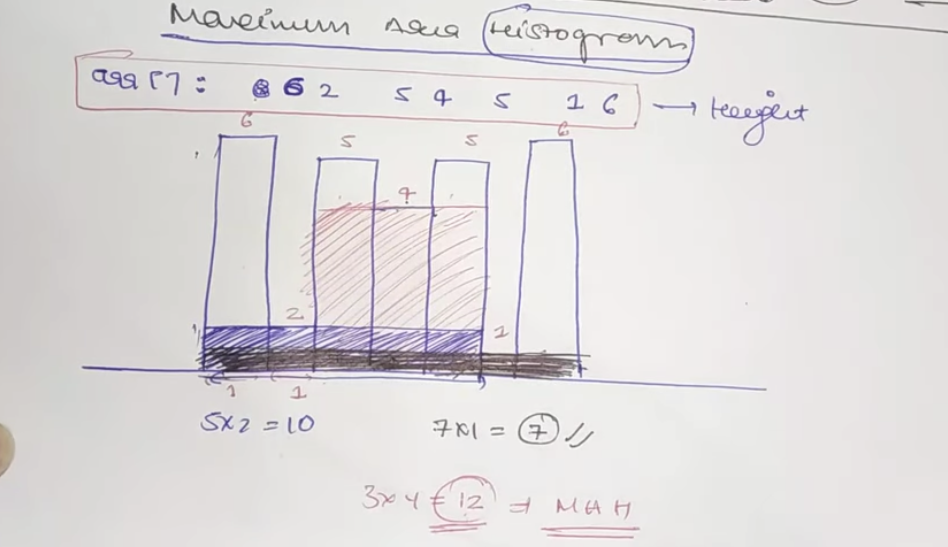


### As we can see in the above diagram, a building can be expanded into neighbouring buildings only till the height of the neighbouring building is >= height of current building.

**Like 4 is expanded into both left building and right building each of height 4**

In [3]:
# Algorithm:

# Find NSL array
# Find NSR array

# No iterate over each element of array and find width of rectangle for each element and calculate its area by muliplying by its value

# For each element:
# Width = abs(NSL - NSR) -1   : when calculating total numbers between 2 numbers and do not want extremity to be included = r-l-1
# Area = element*width
# Update max area 

# ------------------------------- IMPORTANT MANIPULATION---------------------------

#NOTE : Create dummy index at the end of array : They represent building of height=0 and hence will act as minimum NSL and NSR possible
# dummy index on left = -1
# dummy index on right = len(arr) + 1

# this ensures each number its NSL and NSR as they are the smallest therefore the array ends before their NSL or NSR comes.
# For example see 1's NSL and NSR in picture below

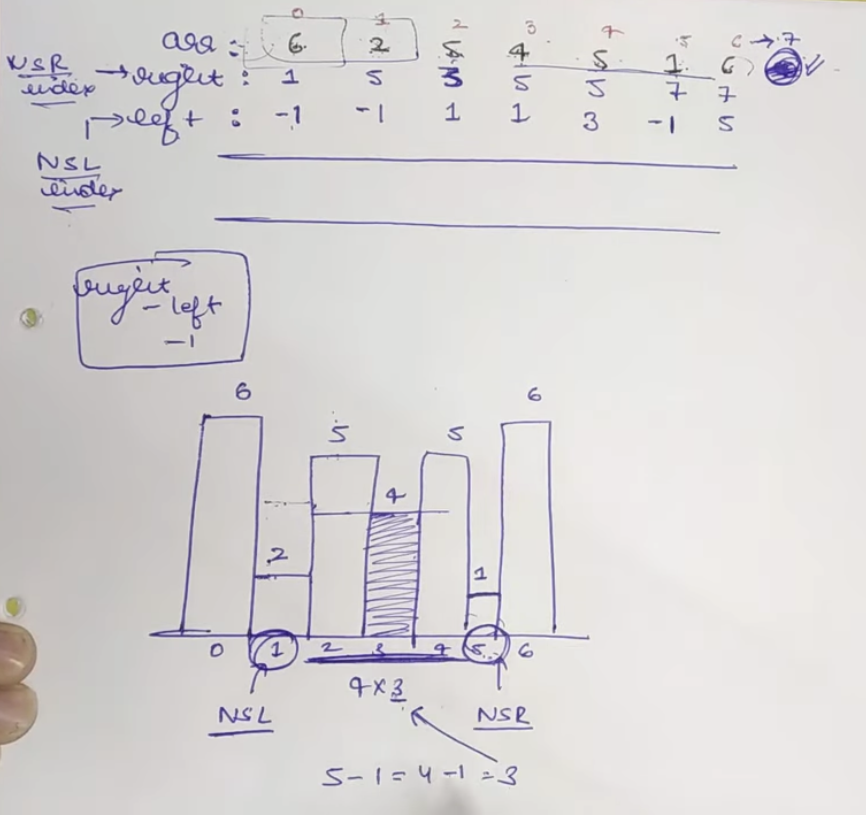

In [8]:
def top(stack):
    
    return stack[-1]

def get_nearest_smaller_integer_INDEX_to_left(heights):
    
    pseudo_index = -1 #this indicates a building of height = 0 and act as minimum NSL possible for any element whose NSL does not exist
    stack = list()
    nsl_index = list()

    for i in range(len(heights)):

        if len(stack) == 0:

            nsl_index.append(pseudo_index)

        else:

            while len(stack) >0 and heights[top(stack)] > heights[i]:
                stack.pop()
                
            # if the stack got empty, it means that there is no NSL for this i-th element, hence its NSL becomes pseudo_index = -1
            if len(stack) == 0:
                nsl_index.append(pseudo_index)
            else:
                nsl_index.append(top(stack))

        stack.append(i)


    return nsl_index

def get_nearest_smaller_integer_INDEX_to_right(heights):
    
    pseudo_index = len(heights) #this indicates a building of height = 0 and act as minimum NSR possible for any element whose NSR does not exist
    stack = list()
    nsr_index = list()

    for i in range(len(heights)-1, -1, -1):

        if len(stack) == 0:

            nsr_index.append(pseudo_index)

        else:

            while len(stack) >0 and heights[top(stack)] >= heights[i]:
                stack.pop()
                
            # if the stack got empty, it means that there is no NSR for this i-th element, hence its NSR becomes pseudo_index = -1
            if len(stack) == 0:
                nsr_index.append(pseudo_index)
            else:
                nsr_index.append(top(stack))

        stack.append(i)


    return nsr_index[::-1]

def largestRectangleArea(heights):
        """
        :type heights: List[int]
        :rtype: int
        """
        
        nsl_index = get_nearest_smaller_integer_INDEX_to_left(heights)
        nsr_index = get_nearest_smaller_integer_INDEX_to_right(heights)
        
        print("NSL", nsl_index)
        print("NSR", nsr_index)
        
        max_area = 0
        
        for i in range(len(heights)):
            
            width = abs(nsl_index[i] - nsr_index[i]) - 1   # no need for abs as ngr_index > ngl_index always
            height = heights[i]
            area_i = width*height
            
            if area_i > max_area:
                max_area = area_i
                
        return max_area
    


In [9]:
histogram = [2,1,5,6,2,3]
print(largestRectangleArea(histogram))

NSL [-1, -1, 1, 2, 1, 4]
NSR [1, 6, 4, 4, 6, 6]
10


# Max rectangular area in a binary matrix

https://leetcode.com/problems/maximal-rectangle/

See OneNote Notes : https://onedrive.live.com/redir?resid=7710AD64D8D1EE45%219888&authkey=%21AHNd77YAAIV7c1k&page=Edit&wd=target%28Stacks-%20Aditya.one%7C5a3ad1e6-8a75-fa4e-8505-873ad811f011%2FMaximum%20Area%20Rectangle%20in%20Binary%20Matrix%7C90b6c7b2-d4bf-d746-9167-ff8d8a9218e6%2F%29&wdorigin=703

In [10]:
# Algorithm

# since we know how to calculate maximum area of rectangle in case of histogram, we can leverage that knowledge here
    
    # but histogram was 1-D array whereas binary matrix is 2-D array
    # But we can treat each row of 2-D array as 1-D array
    # hence we will create histogram of 1-D array from the 2-D array SUCCESSIVELY.
    
    # SUCCESSIVELY means:
    # we will start from a historgram of 0's with number of 0's equal to number of columns
    # then keep adding the value of the 1-D array's of 2-D array taking one at a time
    # at each histogram we get after adding the heights of current 1-D array, we will calculate Max Rect. Area for this histogram
    # so adding each row successively to the histogram we will keep track of the maximum area possible if our 2-D array exist --
    # till this particular 1-D row.
    
    # Note : if a value in a 1-D array comes out to be 0, it means that the base of the building/histogram bar does not exist
    # this potentially means the building/histogram bar does not exist in this column anymore and hence we will make it 0
    # if in case when next row is included and value in that column is 1, then height of that columns's bar will become 1

In [11]:
class Solution(object):

    def top(self, stack):

        return stack[-1]

    def get_nearest_smaller_integer_INDEX_to_left(self, heights):

        stack = list()
        ngl_index = list()

        for i in range(len(heights)):

            if len(stack) == 0:

                ngl_index.append(-1)
                stack.append(i)

            else:

                while len(stack) >0 and heights[self.top(stack)] > heights[i]:
                    stack.pop()

                if len(stack) == 0:
                    ngl_index.append(-1)
                else:
                    ngl_index.append(self.top(stack))

            stack.append(i)


        return ngl_index

    def get_nearest_smaller_integer_INDEX_to_right(self, heights):

        stack = list()
        ngr_index = list()

        for i in range(len(heights)-1, -1, -1):

            if len(stack) == 0:

                ngr_index.append(len(heights))

            else:

                while len(stack) >0 and heights[self.top(stack)] >= heights[i]:
                    stack.pop()

                if len(stack) == 0:
                    ngr_index.append(len(heights))
                else:
                    ngr_index.append(self.top(stack))

            stack.append(i)


        return ngr_index[::-1]

    def largestRectangleArea(self, heights):
            """
            :type heights: List[int]
            :rtype: int
            """

            ngl_index = self.get_nearest_smaller_integer_INDEX_to_left(heights)
            ngr_index = self.get_nearest_smaller_integer_INDEX_to_right(heights)

            max_area = 0

            for i in range(len(heights)):

                width = abs(ngl_index[i] - ngr_index[i]) - 1
                height = heights[i]
                area_i = width*height

                if area_i > max_area:
                    max_area = area_i

            return max_area
    
    
    def maximalRectangle(self, matrix):
        """
        :type matrix: List[List[str]]
        :rtype: int
        """
        # convert 1s and 0s from string to int in the matrix
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                matrix[i][j] = int(matrix[i][j])
        
        
        # now we will convert the 2-D matrix to a 1-D matrix replicating heights of histogram
        # after that we can call the max area of rectangle code to check which histogram
        # gives the maximum rectangle area
        
        max_area = float("-inf") # taking minimum area
        
        rows = len(matrix)
        columns = len(matrix[0])
                  
        histogram = [0]*columns # initialize histogram with 0's meaning no building at all
        
        for i in range(rows):
            
            for j in range(columns):
                
                # if the value of this row,column is 0 , it means that the base of the building does not exist
                # potentially the building does not exist, hence make the histogram bar to 0
                # Else
                # if the value is 1, then add it to the existing height of the building/histogram bar which can be 0 or greater than 0
                if matrix[i][j] == 0:
                    histogram[j] = 0
                else:
                    histogram[j] = histogram[j] + matrix[i][j]
                        
            current_area = self.largestRectangleArea(histogram)
            
            if current_area > max_area:
                max_area = current_area
                
        
        return max_area

In [111]:
arr = [6,2,5,4,5,1,6]
print(largestRectangleArea(arr))

[-1, -1, 1, 1, 3, -1, 5]
[1, 5, 3, 5, 5, 7, 6]
12
